**Introdução à Modelagem Computacional - Grupo F2**

# 2- Modelo de simulação de urnas (30 pontos)

Construa um modelo com duas urnas U1 e U2, cada uma contendo inicialmente
N bolas com cores distintas. A distribuição de cores deve ser a mesma em cada
urna. Realize simulações empregando as seguintes regras. Retira-se ao acaso uma
bola de cada urna e observa-se as cores. Se as cores forem iguais, cada urna
recebe k > 1 bolas da mesma cor que foi retirada. Se as cores forem diferentes,
a bola retirada da urna U1 é devolvida para a urna U2 e vice versa. Considere um
procedimento com 10000 eventos.
1. Escolha um valor fixo de N e outro de k e construa um gráfico com a distribuição das N bolas em cada urna apos 10000 eventos e discuta os parâmetros N e k.

2. Construa um grafico para demonstrar se este modelo segue a lei alguma lei  de potência. 

3. Para diferentes valores de N e de k, discuta a relação entre N/k e o coeficiente angular.

In [5]:
import numpy as np
import pylab as pl

Escolhemos a quantidade N inicial de bolas de cores distintas em cada urna. Definimos também o valor de k, correspondente a quantidade de bolas a serem adicionadas em cada urna se a condição citada na questão for atendida.

A distribuição inicial das bolas será igual nas duas urnas.

Definimos os valores de N e de k

In [6]:
np.random.seed()

N=10
k=3

bolas = ['B-'+("%2.2d"%i) for i in range(N)]

Adicionamos as bolas nas urnas U1 e U2

In [7]:
U1=[i for i in bolas]
U2=[i for i in bolas]

Escolhemos o valor de k e então retiramos uma bola de cada urna aleatoriamente.

Se as bolas forem de cores iguais, adicionamos k bolas dessa cor em cada urna.

Se forem diferentes, trocamos as bolas de urna.

In [8]:
for i in range(10000):
  b1=np.random.choice(len(U1))
  b2=np.random.choice(len(U2))
  
  if U1[b1] == U2[b2]:
    U1 += [U1[b1]]*k
    U2 += [U2[b2]]*k
  else:
    U1 += [U2[b2]]
    U2 += [U1[b1]]
    U1.remove(U1[b1])
    U2.remove(U2[b2])

Pode-se observar a quantidade de bolas de cada cor em cada uma das urnas:

In [9]:
c1,y1=np.unique(U1, return_counts=True)
c2,y2=np.unique(U2, return_counts=True)
a = dict(zip(c1,y1))
b = dict(zip(c2,y2))
print("Urna 1: ",a)
print("Urna 2: ",b)

Urna 1:  {'B-00': 2, 'B-02': 29685, 'B-03': 2, 'B-04': 2, 'B-05': 1, 'B-06': 7, 'B-07': 2, 'B-08': 1, 'B-09': 5}
Urna 2:  {'B-01': 2, 'B-02': 29699, 'B-05': 1, 'B-06': 1, 'B-08': 1, 'B-09': 3}


**Quantidade:**

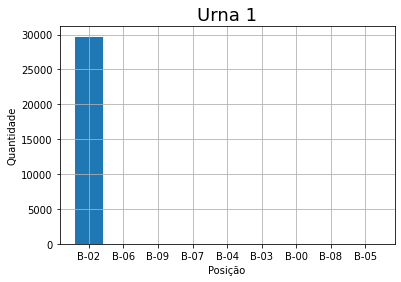

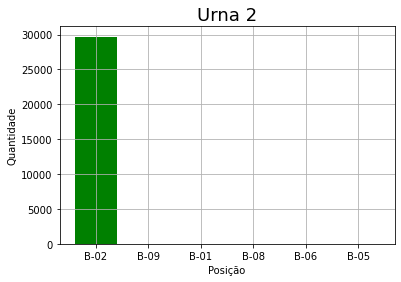

In [10]:
arg1 = np.argsort(y1)
arg1 = arg1[::-1]
pl.bar(c1[arg1],y1[arg1])
pl.xlabel(r'Posição'); pl.ylabel(r'Quantidade'); 
pl.title("Urna 1",fontsize="18")
pl.grid()
pl.show()

arg2 = np.argsort(y2)
arg2 = arg2[::-1]
pl.bar(c2[arg2],y2[arg2],color='g')
pl.xlabel(r'Posição'); pl.ylabel(r'Quantidade'); 
pl.title("Urna 2",fontsize="18")
pl.grid()
pl.show()

**Frequência:**

Frequência das bolas da Urna 1:  {'B-02': 0.9992594338034807, 'B-06': 0.0002356346988925169, 'B-09': 0.00016831049920894064, 'B-07': 6.732419968357625e-05, 'B-04': 6.732419968357625e-05, 'B-03': 6.732419968357625e-05, 'B-00': 6.732419968357625e-05, 'B-08': 3.366209984178813e-05, 'B-05': 3.366209984178813e-05}


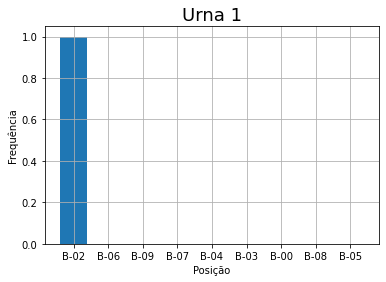


Frequência das bolas da Urna 2:  {'B-02': 0.9997307032012657, 'B-09': 0.00010098629952536439, 'B-01': 6.732419968357625e-05, 'B-08': 3.366209984178813e-05, 'B-06': 3.366209984178813e-05, 'B-05': 3.366209984178813e-05}


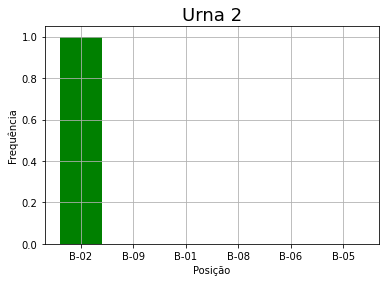

In [11]:
z1=1.0*y1/len(U1)

f1=dict(zip(c1[arg1],z1[arg1]))
print("Frequência das bolas da Urna 1: ",f1)

pl.bar(c1[arg1],z1[arg1])
pl.xlabel(r'Posição'); pl.ylabel(r'Frequência'); 
pl.title("Urna 1",fontsize="18")
pl.grid()
pl.show()


z2=1.0*y2/len(U2)

f2=dict(zip(c2[arg2],z2[arg2]))
print("\nFrequência das bolas da Urna 2: ",f2)

pl.bar(c2[arg2],z2[arg2],color='g')
pl.title("Urna 2",fontsize="18")
pl.xlabel(r'Posição'); pl.ylabel(r'Frequência'); 
pl.grid()
pl.show()

O que percebemos é que, em geral, existirá uma cor cuja quantidade será maior do que as outras em cada urna e essa cor será a mesma para as duas urnas, além de que sua quantidade será proxima nas duas urnas. Essa cor de maior quantidade varia de experimento para experimento, já que fazemos escolhas aleatórias.

É importante observar que, em alguns casos, não teremos nenhuma bola de determinada cor em uma urna ao final do processo, devido as trocas entre as urnas. De qualquer maneira teremos todas as cores iniciais se considerarmos as duas urnas, já que não excluímos nenhuma bola, apenas as trocamos de urna.

Quanto maior o valor de k, maior será a diferença de bolas dessa cor de quantidade maior para as outras, ou seja, maior sua frequência.

Com relação ao N, quanto maior o valor de N maior será a distribuição das cores nas urnas, ou seja, menor será a diferença das quantidades das bolas de cada cor e por consequência menor será a diferença da frequência de cada cor.

Lei de potência:

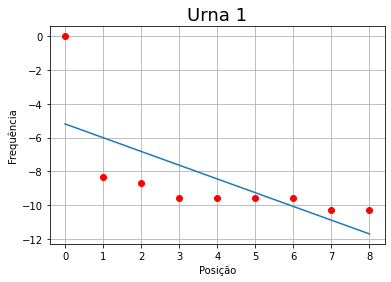

 
-0.8144 x - 5.194


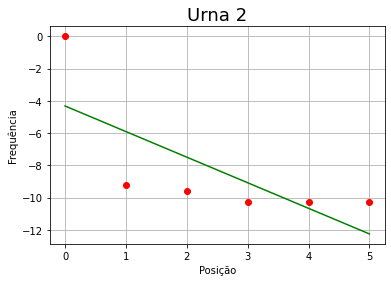

 
-1.585 x - 4.321


In [12]:
# Lei de Zipf
x1=np.array(range(len(z1)))
cc1=np.polyfit(x=x1, y=np.log(z1[arg1]), deg=1); p1=np.poly1d(cc1)
pl.plot(x1,np.log(z1[arg1]),'ro', x1,p1(x1))
pl.xlabel(r'Posição'); pl.ylabel(r'Frequência'); 
pl.title("Urna 1",fontsize="18")
pl.grid()
pl.show()

print(p1)

x2=np.array(range(len(z2)))
cc2=np.polyfit(x=x2, y=np.log(z2[arg2]), deg=1); p2=np.poly1d(cc2)
pl.plot(x2,np.log(z2[arg2]),'ro', x2,p2(x2), 'g')
pl.xlabel(r'Posição'); pl.ylabel(r'Frequência'); 
pl.title("Urna 2",fontsize="18")
pl.grid()
pl.show()
print(p2)

Podemos observar que o experimento das urnas segue a Lei de Zipf.
Mas devido ao grande número de vezes (10000) que retiramos uma bola, testamos se são iguais ou não e então fazemos o que foi determinado, ou seja, ou a troca ou a adição de mais bolas, o final do experimento tende a que tenhamos uma cor com frequência tendendo a 1, enquanto todas as outras tendem a 0 (o que pode ser observado nos gráficos de frequência).


Após fazer alguns testes com valores de N e k diferentes, podemos concluir que:

O coeficiente angular é sempre negativo.

Vamos então analisar a relação $N/k$ e o coeficiente angular:

Quanto maior o valor de $N/k$, maior é o coeficiente angular, ou seja, mais próximo de zero já que ele é negativo.

Quanto menor for $N/k$, ou seja, mais próximo de zero já que N e k são positivos, menor será o coeficiente angular.
